In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Looking at the tgcat data for GD394

In [21]:
path = '/media/david/1tb_storage1/emergency_data/gd394/chandra/tgcat/'
obs = glob.glob('{}obs*'.format(path))
obs

['/media/david/1tb_storage1/emergency_data/gd394/chandra/tgcat/obs_21181_tgid_6072',
 '/media/david/1tb_storage1/emergency_data/gd394/chandra/tgcat/obs_22956_tgid_6070']

In [5]:
# os.listdir(obs[0])

In [7]:
lc1 = fits.open('{}/lc'.format(obs[0]))

In [8]:
lc1.info()

Filename: /media/david/1tb_storage1/emergency_data/gd394/chandra/tgcat/obs_21181_tgid_6072/lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU    305   52R x 10C   [1J, 1D, 1D, 1D, 1J, 1D, 1D, 1D, 1D, 1D]   
  2  GTI           1 BinTableHDU     26   1R x 2C   [1D, 1D]   


In [9]:
data = lc1[1].data

In [10]:
data.names

['TIME_BIN',
 'TIME_MIN',
 'TIME',
 'TIME_MAX',
 'COUNTS',
 'STAT_ERR',
 'AREA',
 'EXPOSURE',
 'COUNT_RATE',
 'COUNT_RATE_ERR']

<ErrorbarContainer object of 3 artists>

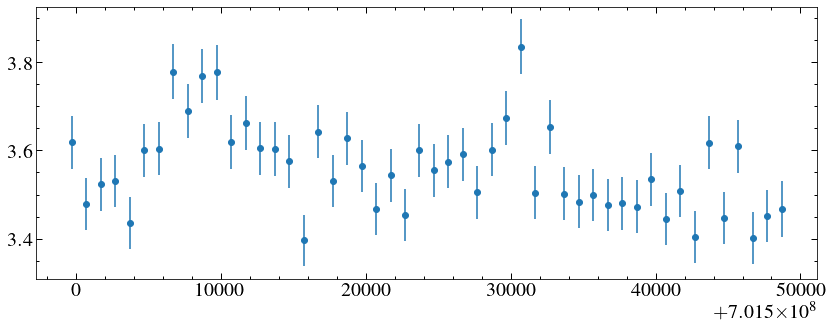

In [12]:
plt.errorbar(data['TIME'][1:-1], data['COUNT_RATE'][1:-1], yerr=data['COUNT_RATE_ERR'][1:-1], marker='o', ls='none')

In [13]:
bg1 = fits.open('{}/lc_bg'.format(obs[0]))

In [14]:
bgdata = bg1[1].data

In [15]:
bgdata.names

['TIME_BIN',
 'TIME_MIN',
 'TIME',
 'TIME_MAX',
 'COUNTS',
 'STAT_ERR',
 'AREA',
 'EXPOSURE',
 'COUNT_RATE',
 'COUNT_RATE_ERR']

<ErrorbarContainer object of 3 artists>

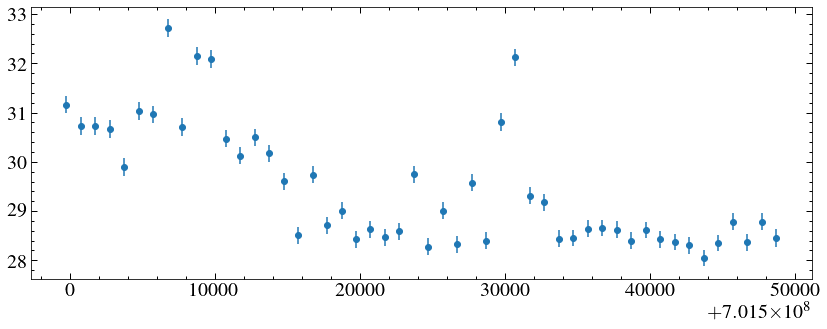

In [16]:
plt.errorbar(bgdata['TIME'][1:-1], bgdata['COUNT_RATE'][1:-1], yerr=bgdata['COUNT_RATE_ERR'][1:-1], marker='o', ls='none')

In [17]:
bgdata['TIME']

array([7.01498713e+08, 7.01499713e+08, 7.01500713e+08, 7.01501713e+08,
       7.01502713e+08, 7.01503713e+08, 7.01504713e+08, 7.01505713e+08,
       7.01506713e+08, 7.01507713e+08, 7.01508713e+08, 7.01509713e+08,
       7.01510713e+08, 7.01511713e+08, 7.01512713e+08, 7.01513713e+08,
       7.01514713e+08, 7.01515713e+08, 7.01516713e+08, 7.01517713e+08,
       7.01518713e+08, 7.01519713e+08, 7.01520713e+08, 7.01521713e+08,
       7.01522713e+08, 7.01523713e+08, 7.01524713e+08, 7.01525713e+08,
       7.01526713e+08, 7.01527713e+08, 7.01528713e+08, 7.01529713e+08,
       7.01530713e+08, 7.01531713e+08, 7.01532713e+08, 7.01533713e+08,
       7.01534713e+08, 7.01535713e+08, 7.01536713e+08, 7.01537713e+08,
       7.01538713e+08, 7.01539713e+08, 7.01540713e+08, 7.01541713e+08,
       7.01542713e+08, 7.01543713e+08, 7.01544713e+08, 7.01545713e+08,
       7.01546713e+08, 7.01547713e+08, 7.01548713e+08, 7.01549713e+08])

In [18]:
data['TIME']

array([7.01498713e+08, 7.01499713e+08, 7.01500713e+08, 7.01501713e+08,
       7.01502713e+08, 7.01503713e+08, 7.01504713e+08, 7.01505713e+08,
       7.01506713e+08, 7.01507713e+08, 7.01508713e+08, 7.01509713e+08,
       7.01510713e+08, 7.01511713e+08, 7.01512713e+08, 7.01513713e+08,
       7.01514713e+08, 7.01515713e+08, 7.01516713e+08, 7.01517713e+08,
       7.01518713e+08, 7.01519713e+08, 7.01520713e+08, 7.01521713e+08,
       7.01522713e+08, 7.01523713e+08, 7.01524713e+08, 7.01525713e+08,
       7.01526713e+08, 7.01527713e+08, 7.01528713e+08, 7.01529713e+08,
       7.01530713e+08, 7.01531713e+08, 7.01532713e+08, 7.01533713e+08,
       7.01534713e+08, 7.01535713e+08, 7.01536713e+08, 7.01537713e+08,
       7.01538713e+08, 7.01539713e+08, 7.01540713e+08, 7.01541713e+08,
       7.01542713e+08, 7.01543713e+08, 7.01544713e+08, 7.01545713e+08,
       7.01546713e+08, 7.01547713e+08, 7.01548713e+08, 7.01549713e+08])

[4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09]
[4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.29

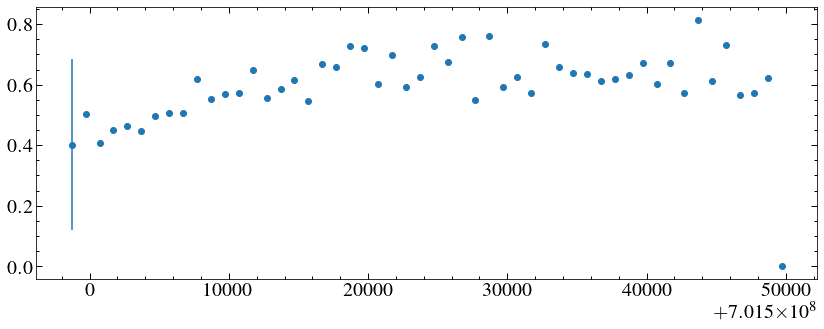

[4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09]
[4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.2949673e+09
 4.2949673e+09 4.2949673e+09 4.2949673e+09 4.29

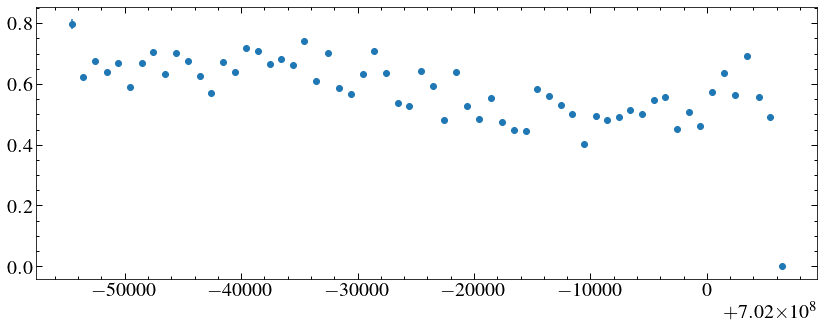

In [42]:
time = np.array([], dtype=float)
counts = np.array([], dtype=float)
error = np.array([], dtype=float)
for ob in obs:
    lc = fits.getdata('{}/lc'.format(ob), 1)   
    bg = fits.getdata('{}/lc_bg'.format(ob), 1)
#     print(lc['AREA'])
#     print(bg['AREA'])
    t, c, ce, bgc, bgce = lc['TIME'], lc['COUNT_RATE'], lc['COUNT_RATE_ERR'], bg['COUNT_RATE']/10, bg['COUNT_RATE_ERR']/10
    nc = c-bgc
    ne = (ce**2+bgce**2)
    plt.errorbar(t, nc, yerr=ne, marker='o', ls='none')
    time = np.concatenate((time, t[1:-1]))
    counts = np.concatenate((counts, nc[1:-1]))
    error = np.concatenate((error, ne[1:-1]))
    plt.show()

In [43]:
bg1[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   72 / width of table in bytes                        
NAXIS2  =                   52 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   10 / number of fields in each row                   
EXTNAME = 'LIGHTCURVE'         / name of this binary table extension            
HDUNAME = 'LIGHTCURVE'         / ASCDM block name                               
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'dmextract - Version CIAO 4.12' / tool that created this output       
ASCDSVER= 'CIAO 4.12'       

<ErrorbarContainer object of 3 artists>

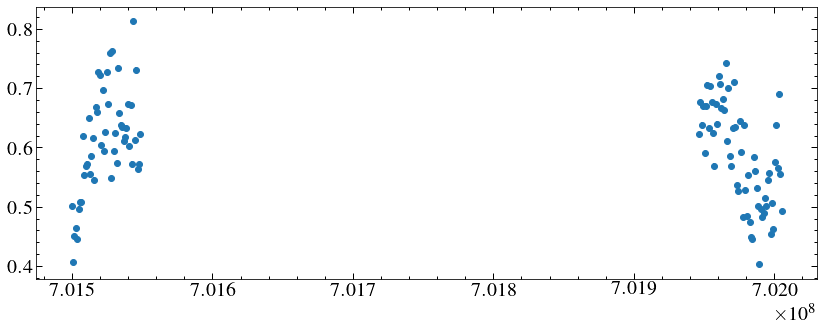

In [32]:
plt.errorbar(time, counts, yerr=error, marker='o', ls='none')

In [39]:
tfold = time/(1.1468*u.d.to(u.s)) % 1

<ErrorbarContainer object of 3 artists>

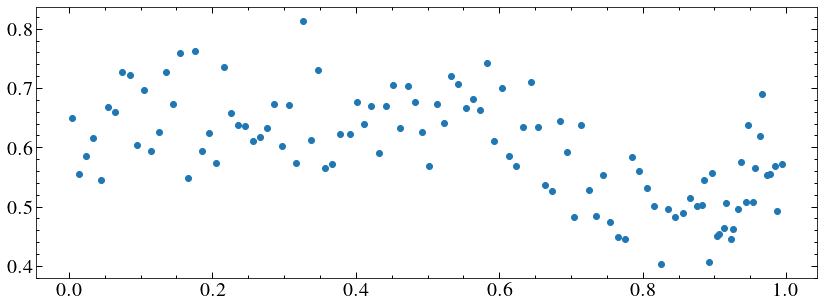

In [40]:
plt.errorbar(tfold, counts, yerr=error, marker='o', ls='none')